### Exploring data 

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
dfd = pd.read_csv("./day.csv")
dfh = pd.read_csv("./hour.csv")

In [4]:
dfh.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32


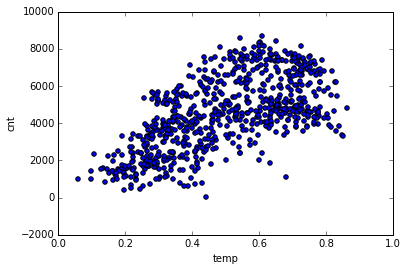

In [19]:
dfd.plot(kind='scatter',x='temp',y='cnt')

In [17]:
#dfh.loc[:,list(set(dfh.columns) - set(['cnt']))]

In [24]:
dfh_oneday = dfh.loc[dfh.dteday=='2011-01-01',:]

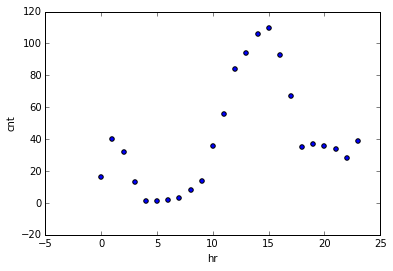

In [26]:
dfh_oneday.plot(x='hr',y='cnt',kind='scatter')

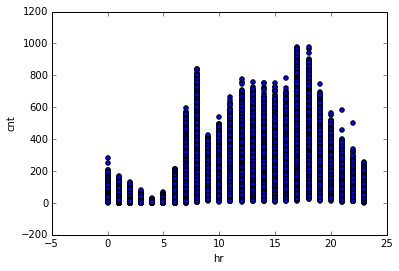

In [27]:
dfh.plot(x='hr',y='cnt',kind='scatter')

In [37]:
print dfd.shape
print dfh.shape

(731, 16)
(17379, 17)


In [52]:
dfh_train_features = dfh[:1700].loc[:,['temp','season','temp','atemp','workingday','windspeed','weekday','hum','weathersit','holiday']]
dfh_train_target = dfh[:1700].loc[:,['casual','registered','cnt']]
dfh_test_features = dfh[1701:].loc[:,['temp','season','temp','atemp','workingday','windspeed','weekday','hum','weathersit','holiday']]
dfh_test_target = dfh[1701:].loc[:,['casual','registered','cnt']]

In [39]:
dfd_train_features = dfd[:70]
dfd_test = dfd[71:]

In [54]:
lr = LinearRegression(fit_intercept=True)
lr.fit(dfh_train_features, dfh_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr.predict()

### Submission on 20150714 

In [8]:
import pandas as pd
#import sklearn as sk
from sklearn.linear_model import LinearRegression

def get_feature_mat(fname):
	#feature engineering in this funciton is applied to both test and train
	df 	= pd.read_csv("./"+fname)
	return(df)

train, test = [get_feature_mat(fname) for fname in ['train.csv', 'test.csv']]
print('\nSummary of train dataset:\n')
print(train.describe())
print('\nSummary of test dataset:\n')
print(test.describe())

#print(train.columns.values)
#print(test.columns.values)

train_data = train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]
train_cnt, train_casual, train_registered = train[['count']], train[['casual']], train[['registered']]

test_data = test[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]
# Fit linear regression model with training data
lr_count = LinearRegression(fit_intercept=True)
lr_count.fit(train_data, train_cnt)


Summary of train dataset:

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.24503

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lr_count_pred = lr_count.predict(test_data)
#test.columns.values
result = test[['datetime']]
result.loc[:,'count'] = lr_count_pred
result.loc[:,'count'].loc[result.loc[:,'count'] < 0] = 0
result

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'], dtype=object)

In [58]:
result.to_csv("./submission_20150714.csv",index=False)